
# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Tuesday) 11:00 pm </b> </font>

# <font color="blue"> Sayali More </font>

# Introduction

The objective of this assignment is to understand the working of Linear Model, Least Square and Least Mean Square.
The linear model when defined as a Euclidean Dot product, it can be given as :
f(x;w)=w⊤x
where w is a weight vector and X is matrix of the input features.
When using this linear model for making predictions , the vector w plays an important role and thus finding the w vector that gives the best predictions or reduces the euclidean distance between two T( actual target value)solve this linear model there are two approaches to find the 'w' vector 
1. Analytically - Least Squares
2. Using Gradient Descent - Least Mean Square

Least square uses the entire dataset to train and find the best fit. This can be costly computationally as Least square method requires the input feature matrix to be inverted which is computationally expensive. 
When the dataset is large enough we can consider sequential or Online training to find the best fit which can be done using Least Mean Square. In least mean square instead of using the entire data at one time we train the model with each instance at a time and thus make the calculation less expensive.

Here, we will apply both the techniques and find the best fit for the data and make predictions which will then be plotted against the actual target values. In order to find the accuracy we will be using RMSE measure as it is the best method to find the accuracy of the Regression model.

# Data

This data has been collected from the Bike sharing systems. These systems keeps record of the duration of travel, departure and arrival position, whole process from membership, rental and return back is explicitly recorded in these systems. The data is recorder for year 2011-2012. The data can be used to predict the count(real value number) of bikes that can be rented given the other features. 

#### Source:
    The data has been taken from UCI Machine Learning Repository http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset. The data is saved in a csv file.

#### Description:

The data has dimensions as 17Kx16 i.e. it has total 17389 instances and 16 columns.

Column Description: 

| Column Name     | Description                                        |
|-----------------|---------------------------------------------------| 
|   instant          | Record index             |
| dteday        | Date  when recorded                                       |  
|  season        | season (1:springer, 2:summer, 3:fall, 4:winter) |          
|   yr       | year (0: 2011, 1:2012)| 
| mnth        | month ( 1 to 12) |
|  hr    | hour (0 to 23) |            
|   holiday      | weather day is holiday or not (extracted from [Web Link])      |
| weekday     | day of the week (Sun - Sat) | 
| workingday   |  if day is neither weekend nor holiday is 1, otherwise is 0 | 
| weathersit      |- 1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
| temp      |Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) |
| atemp    |  Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) |              
| hum    | Normalized humidity. The values are divided to 100 (max)  |
| windspeed     |Normalized wind speed. The values are divided to 67 (max)      |
| casual     |  count of casual users|
| registered     | count of registered users   |
| cnt     |count of total rental bikes including both casual and registered |

# Visualization

In [10]:
import numpy as np 
import pandas as pd
import sys, os
from abc import ABC, abstractmethod
import warnings 
warnings.simplefilter(action='ignore', category = Warning)
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import cufflinks as cf
import datetime
from sklearn.metrics import mean_squared_error
%matplotlib inline
#%matplotlib notebook

In [12]:
df = pd.read_csv("Hour.csv")

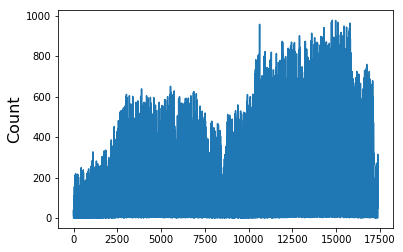

In [13]:
plt.ylabel('Count', fontsize=16)
plt.plot(df.loc[:, 'cnt'])

Text(0.5,0,'Count of bikes')

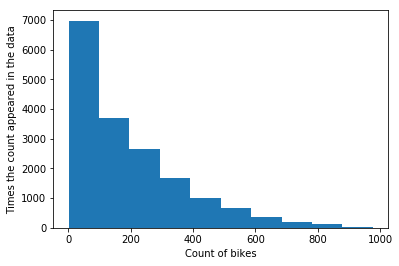

In [14]:
plt.hist(df.loc[:, 'cnt'], label = 'Count')
plt.ylabel('Times the count appeared in the data')
plt.xlabel('Count of bikes')

 As can be seen from the above plot that the maximum count of bikes rented per day lying between the range 0-100 is maximum. Followed by range of count from 100-150 and so on. The list number of bikes range rented were between 900-1000.
 Also, it is skewed left and so needs to be transformed and Normally Distributed.

In [15]:
df = df.drop(['dteday', 'instant'], axis = 1)

pdX = df.iloc[:, :-1]
pdT = df.iloc[:, -1]

In [16]:
df_model = df.drop(['season', 'mnth', 'yr', 'holiday', 'weekday', 'weathersit','atemp'], axis = 1)

In [17]:
def MinMaxscale(df):
    data_min = df.min(axis=0)
    data_max = df.max(axis=0)
    data = (df - data_min) / (data_max - data_min)
    return data

data_m = MinMaxscale(df_model)
pd_X = data_m.iloc[:, :-1]
pd_T = data_m.iloc[:, -1]

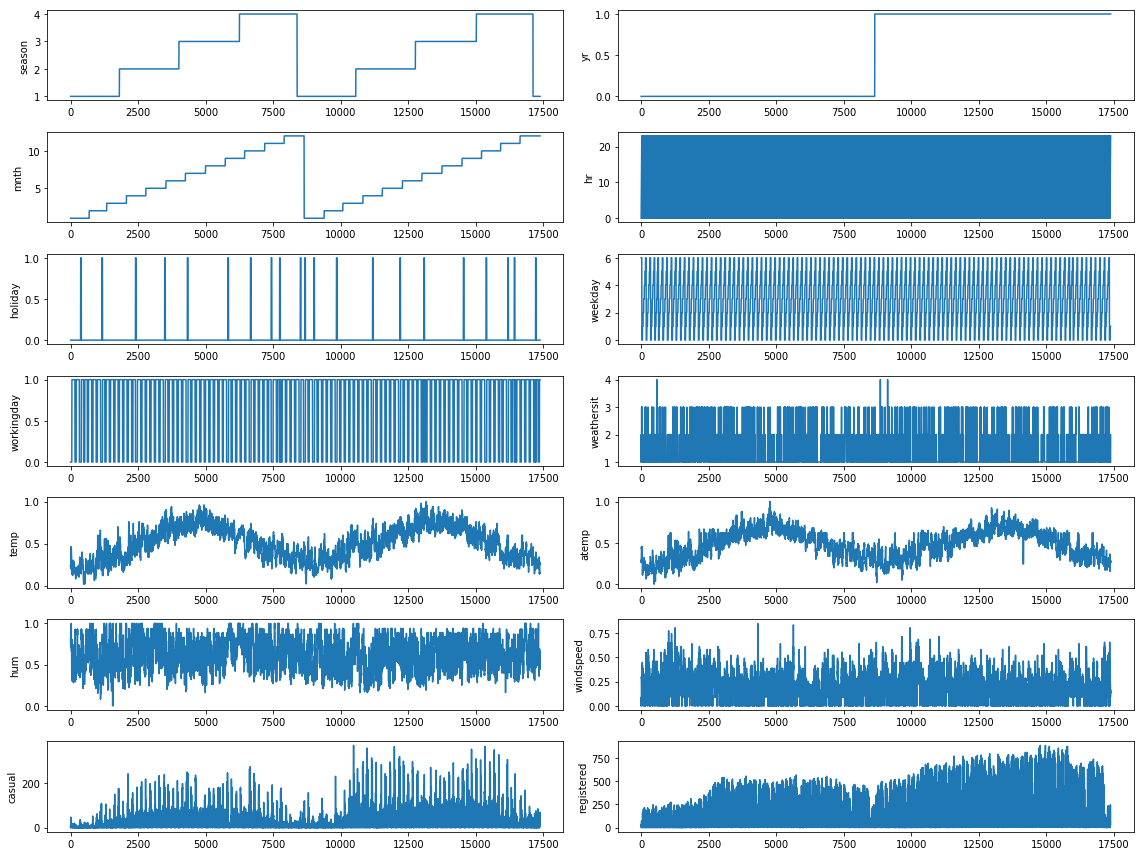

In [18]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(14):
    plt.subplot(7, 2, i+1)
    plt.plot(pdX.iloc[:, i])
    plt.ylabel(pdX.columns.values[i])
fig.tight_layout()

###### Preliminary Observations:
- The seasons graph shows that our dataset has the data of entire two years including all the seasons of the year. Which can help our model compare the data of two years and find the pattern in it to train on.
- The hr graph shows that we have every hours data in our dataset. This observation can also be applied to the weekday and working day data we have in our dataset.
- From the weather situation graph it can be seen that only once in the first quarter of the year the weather conditions were a bit critical having Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow, Fog. 
- The temp and atemp shows that in the middle of the year the temperature rises to the maximum in the entire year.
- The graph plotting humidity shows maximum humidity rate falls between the range of 0.4 - 0.8
- The windspeed plot shows that the windspeed mostly rises till 0.4 and very rarely does it increases beyond that in a period of an year. It can be observed in the second half of 2011 year the wind speed had fallen to 0.3. 
- As can be observed from the casual graph, the number of casual or unregistered users renting bikes has increased significatly in 2012 than as compared to 2011.
- Similarly, the number of registered users renting the bike has also increased greatly in the last half year of 2012.

In [19]:
D = pd.concat([pdX, pdT], axis=1)
# D

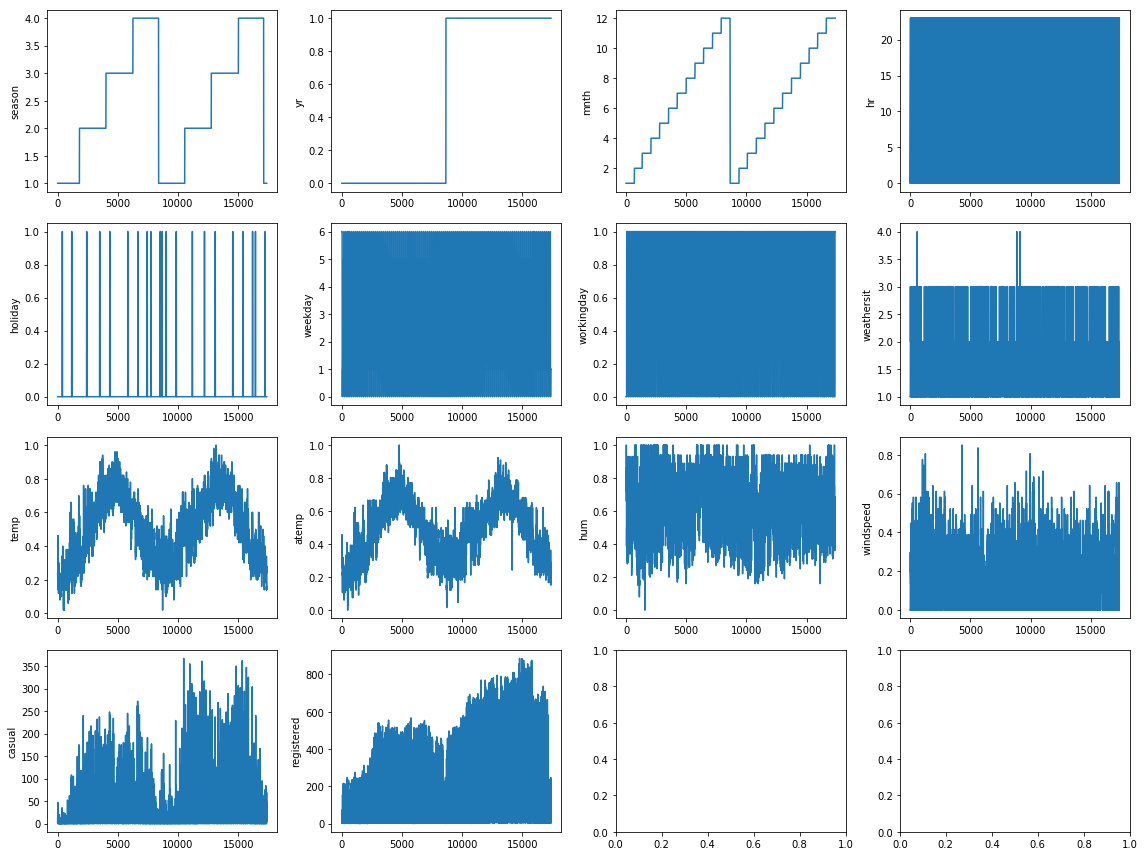

In [20]:
#Plotting graphs using Panda's dataframe.plot function

fig, axes = plt.subplots(4,4)
fig.set_figheight(12)
fig.set_figwidth(16)
for i,c  in enumerate(pdX.columns.values):
    D.iloc[:, i].plot(y=c, ax=axes[int(i/4), i%4])
    axes[int(i/4), i%4].set_ylabel(c)
fig.tight_layout()

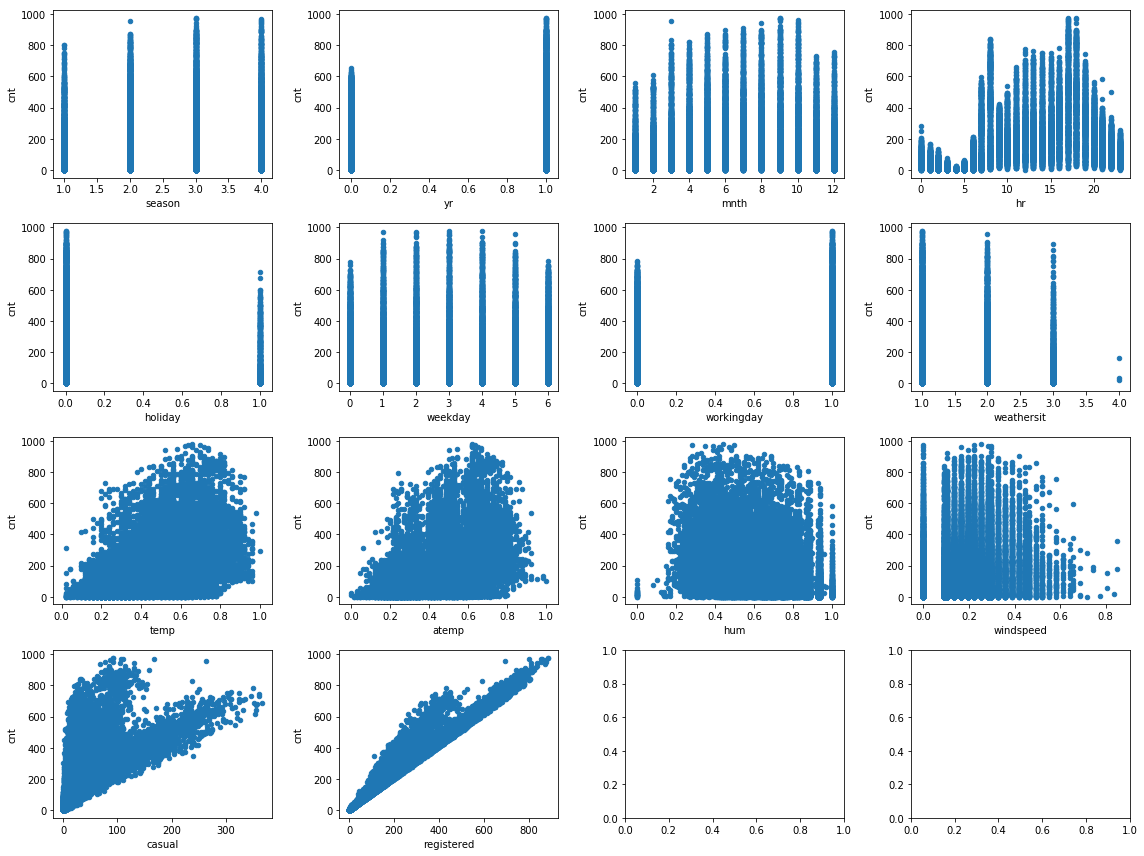

In [21]:
def area_scatter():
    fig, axes = plt.subplots(4,4)
    fig.set_figheight(12)
    fig.set_figwidth(16)
    for i,c  in enumerate(pdX.columns.values):
        D.plot.scatter(c, 'cnt', ax=axes[int(i/4), i%4])
    fig.tight_layout()
    
area_scatter()

Preliminary Observations:
- In year 2012 the count of the bike rented has increased alot(as the graph's height has increased in the second half) everyday (as the graph is dense)
- As can be seen from the Season vs Count graph, the bikes are rented more in Fall and Winter season than in Springer and Summer Season.(May be due to pleasant climate of Fall and high temeprature of Summers)
- As studied from the above graphs the count of bike being rented has increased substantially in 2012 as compared to 2011.
- In Month vs Count graph, it can be seen that the count is high from March and it goes till October(Covering Fall and Winter Season)
- From hr vs Count graph it can be seen that the bikes are rented more during 6th, 7th hour in the morning and around 16th, 17th, 18th hour in the evening.(May be denoting the time when individual commute to jobs or School or back home from Office or Schools
- The plot of Holiday vs Count shows higher number of bikes being rented on Non-Holiday days than Holiday days.
- In weekday graph the bikes are rented more from Monday-Friday than as compared to Saturday and Sunday.
- The working day vs Count graph shows that the bikes are rented more on Working days.(as seen from weekday graph)
- An obvious trend can be seen from the Weather Situation vs Count graph where when the weather if good like Clear, Few clouds, Partly cloudy more people tend to rent bikes than on adverse conditions like Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow, Fog. The second highest count is recorded when the weather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist and a little lesser than that when the weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
- From temp and atemp graphs it can be seen when the temperature is moderate between 0.4 t0 0.8 more number of bikes are rented.
- From humidity vs count it can be seen that more bikes are rented when the humidity crosses 0.2
- More bikes are rented when the windspeed is less and it falls as the windspeed increases(for obvious reason it is easy(less efforts) to bike when the windspeed is less)
- Out of the total count, the number of casual users falls between 0-100 range when the total count is between 0 to 800. Similarly, more in the range of 100 to 200 when the total count is 200 to 450. Also, it can be observed that the maximum number of bikes rented by casual users is less than 400(350-360)
- The number of registered users renting bikes increases linearly with the total count. The maximum number of bikes rented by registered users crosses 800.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002177A2DC4E0>],
      dtype=object)

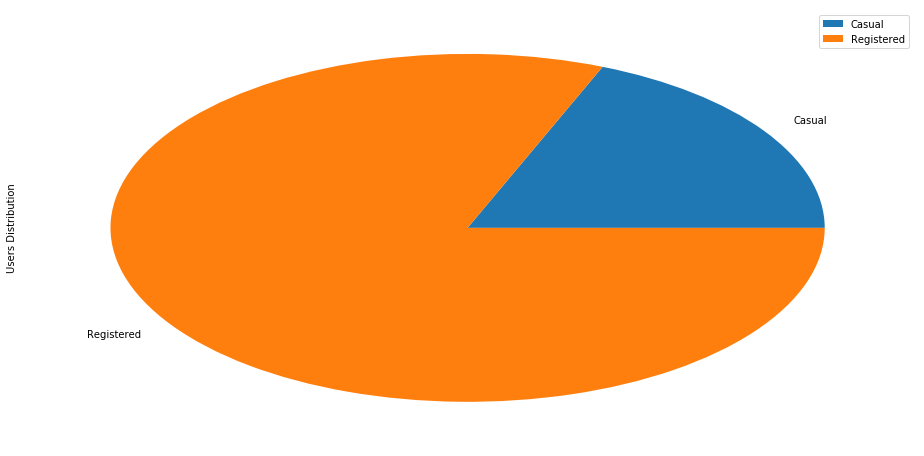

In [22]:
#Plotting the total count of Causal and Registered Users renting bike on piechart
cas = pdX['casual'].sum()
reg = pdX['registered'].sum()

df_pie = pd.DataFrame({'Users Distribution':[cas, reg]}, index=['Casual', 'Registered'])
df_pie.plot(kind='pie', subplots=True, figsize=(16,8))

Preliminary Observations:
- As can be seen from above graph, the share of registered users renting the bikes is more from the total count of bikes being rented.

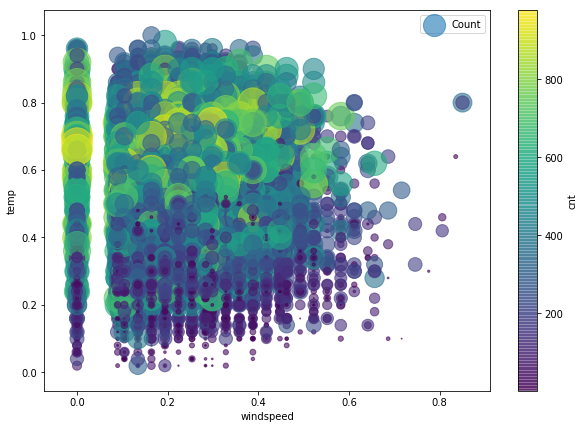

In [23]:
fig, ax = plt.subplots()
D.plot(kind="scatter",x='windspeed',y='temp',s=D['cnt'], label="Count",alpha=0.6, figsize=(10,7),c='cnt', cmap=plt.get_cmap(name = None), colorbar=True,ax=ax)

Preliminary Observations:
- It can be summarized from the above plot that as the temperature increases but the windspeed is moderate the count of bikes being rented goes high from 500-800

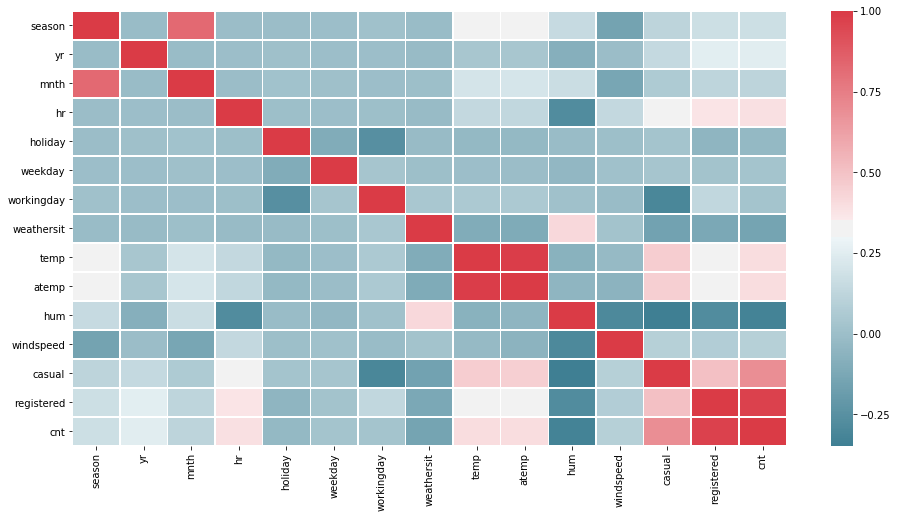

In [24]:
#Correlation map using Seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = D.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cmap,linewidths=.5)

reliminary Obseravtions:
- As can be seen from the map, season is positively correlated with month, temp amd atemp and is negatively correlated with the rest. Causal users count is positively related to temp, atemp, registered and Count. Humidity is positively correlated with Weather Situation and negatively correlated with  the rest. Count is positively correlated with hr, temp, atemp, Casual and Registered users.

# Method

## Review:

- As discussed in the Introduction earlier we will be using two methods to find the perfect fit to the model. 
 1. Least Square.
 2. Least Mean Square.
 
- Least square uses the entire dataset to train and find the best fit. This can be costly computationally as Least square method requires the input feature matrix to be inverted which is computationally expensive. When the dataset is large enough we can consider sequential or Online training to find the best fit which can be done using Least Mean Square. In least mean square instead of using the entire data at one time we train the model with each instance at a time and thus make the calculation less expensive.

- Here, we will apply both the techniques and find the best fit for the data and make predictions which will then be plotted against the actual target values. In order to find the accuracy we will be using RMSE measure as it is the best method to find the accuracy of the Regression model.

## Explanation of Codes:

- Implementation of my LinearModel class:
  It consists of following function definitions-
  - __init__() - this function instantiates the class and sets the w variable to None(initializes it).
  - _check_matrix() -  this function checks if the inout features X is of the type matrix. If not it throws an error.
  - add_ones() - this functkon adds ones (bias) to the input features inorder to make the model more flexible.
  - partition() - this function divides the data into Train and Test sets and returns it.
  - Normalize() -  this function is used to normalize the input text.
 - Abstract Classes:
  - train(), use(): these are abstract methods which doesn't have anynimplementation but they are implemented by the Sub classes. 
  
- This class serves as the Base Class for the LinearRegress(LS) and LMS class. These two classes uses the functions defined in this class. 
- LinearModel class has a Super class BaseModel. It is a Supe Class for the Machine Learning Models.

Linear Models Implementation:

- Least Square
 - Class LinearRegress implements the Least Sqaure model. The methods it uses are as follows:
    - __init__() : this function is used to initialize the Super Class LinearModel. so that we will be able to use the methods and variables from the SuperClass.
    - train() : this trains the model finds the w value that can be used to predict the target value on the test set.
    - use() : this function is used to predict the target values on the unseen data using the w calculated above.
    - Estimate() : this function is used to find the error rate and plot the graph of predictions and actual values.
  
- Least Mean Square
 - Class LMS implements the least mean square model. The methods it uses are:
    - __init__(): this instantiates super class and initializes alpha.
    - train() : this function is used for batch training whereas in our model our batch size is 1 input instance ( following Stochastic or Sequential Gradient descent.
    - train_step() : It actually takes only one input at a time applies the LMS formula and finds w.
    - use() : this function uses the w value to predict the target value.
    - Estimate() : this function is used to find the error rate and plot the graph of predictions and actual values.
    - Live() : This function calculates the RMSE score for one single predicted value and actual value and plots it.
    
Extras:
 - In my code I haven't used Normalization though I have kept the implementation of how Normalization is done. For Feature Scaling I have used MinMaxScaler(). It has been implemented in the initial cells using formula instead of using scikit learn. As, while trying other scaling methods MinMaxScalar gave the best output.


In [25]:
# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

In [26]:
class LinearModel(BaseModel):
    
    def __init__(self):
        #done
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        #done
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    def partition(X, T, ratio=[0.8, 0.2]):
        assert(np.sum(ratio) == 1)
         # shuffle the data indices 
        idxs = np.random.permutation(X.index)
        # the number of samples 
        N = X.shape[0]
    
        Xs = []
        Ts = []
        i = 0  # first index to zero
        for k, r in enumerate(ratio):
#             print("Pass 1")
            nrows = int(round(N * r))  # number of rows
            
            if k == len(ratio) -1:
                Xs.append(X.iloc[i:, :])
                Ts.append(T.iloc[i:,])
            else:
                row = i+nrows
                Xs.append(X.iloc[:row, :])
                Ts.append(T.iloc[:row,])
        
            i += nrows
    
        return Xs, Ts
    
    
    def Normalize(self, pdX):
        mu = pdX.mean()
        std = pdX.std()
        ndfX = (pdX - mu) / std
        return ndfX
    

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

# Least Square

In [27]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """

        
    
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T): 
        X = LinearModel.add_ones(self, X)
        self.w = np.linalg.lstsq(X.T @ X, X.T @ T)[0]
        return self.w

    
    # apply the learned model to data X
    def use(self, X):
       
        X_test = LinearModel.add_ones(self, X)
        Y = X_test @ self.w

        return Y

    def Estimate(self, Y, T):
        plt.clf
        Tlog = (np.log(pd.DataFrame(T) + 1)).as_matrix()
        E = Tlog-Y        
        plt.plot(Tlog, 'ob')
        plt.plot(Y, 'xr')
        return E
    

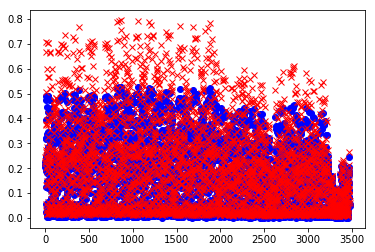

In [28]:
p = LinearRegress()
N = df.shape[0]
Tlog = (np.log(pd_T + 1)).as_matrix()

X,T = LinearModel.partition(pd.DataFrame(pd_X),pd.DataFrame(Tlog))
X_train = X[0]
X_test = X[1]
T_train = T[0]
T_test = T[1]
# print(T)
ls_w = p.train(X_train.as_matrix(),np.asarray(T_train))
# print(ls_w)
Y = p.use(X_test.as_matrix())
E = p.Estimate(Y, T_test)

# print(T_test)
lin_mse = mean_squared_error(T_test, Y)
lin_rmse = np.sqrt(lin_mse)
# print(lin_rmse)

- in the above graph for maximum of the inout instances the predictions are correct except for few where they have predicted  higher values than the actual ones.

# Least Mean Square

In [29]:
import collections # for checking iterable instance
import IPython.display as ipd  # for display and clear_output
# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        self.w = np.zeros(((X.shape[1] + 1),  T.shape[1]))
        
        for i in range(X.shape[0]):
            LMS.train_step(self, X[i] ,T[i])
           
        return self.w
        
           
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        npz= np.hstack((1, x))
        npz_X = pd.DataFrame(npz).as_matrix()
        t = pd.DataFrame(t).as_matrix()
        if(type(self.w) == type(None)):
            self.w = np.zeros(((X.shape[1] + 1),  T.shape[1]))
            
        res1 = (self.w.T @ npz_X)
        res2 = res1 - t
        res3 = res2 * npz_X
        res4 = self.alpha * res3 
        self.w -= res4
        
        return self.w
    
    # apply the current model to data X
    def use(self, X):
        X_test = LinearModel.add_ones(self, X)
        self.w = np.asarray(self.w)
        Yp = X_test @ self.w
        return Yp  

    def Estimate(self, Y, T):
        np.sqrt(np.mean((Y -  T)**2))
        plt.plot(T, 'ob')
        plt.plot(Y, 'xr')
        return E

    def Live(self, Y_lms, Tlog):
        errs = []
        
        fig = plt.figure(figsize=(16,8))
        for i in range(Tlog.shape[0]):
            errs.append( np.sqrt(np.mean(Tlog - Y_lms)**2) )
            plt.clf()
            plt.subplot(1,2, 1)
            plt.plot(errs)
            plt.ylabel("RMSE")
            plt.subplot(1,2, 2)
            plt.plot(Tlog[:i])
            plt.plot(Y_lms[:i])
            plt.ylabel("Current Estimation")
    
    
            ipd.clear_output(wait=True)
            ipd.display(fig)
        ipd.clear_output(wait=True)
        return errs
    

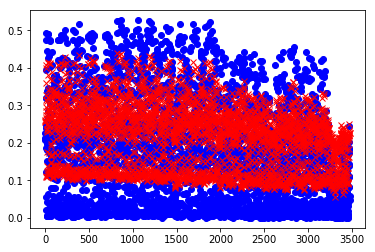

In [30]:
from sklearn.metrics import mean_squared_error

lm = LMS(0.001)
npX = X_train.as_matrix()
npT = T_train.as_matrix()
lms_w = lm.train(npX, npT)
# print(lms_w[1:])
# finw = lm.train_step(npX[0], npT[0])
Y = lm.use(X_test.as_matrix())
lin_mse = mean_squared_error(T_test, Y)
lin_rmse = np.sqrt(lin_mse)
# print(lin_rmse)
E = p.Estimate(Y, T_test.as_matrix())
# print("RMSE: {0}".format(errsE = p.Estimate(Y, T_test)[-1]))
# print(Y)

- The w value obtained from Least square gives more accurate predictions than the Least mean square approach.
- As can be seen the actual results (in blue) are more dispersed along the graph. but, the prediction plot (in red) isn't that dispersed and doesn't fall under the same range for quite some input instances.

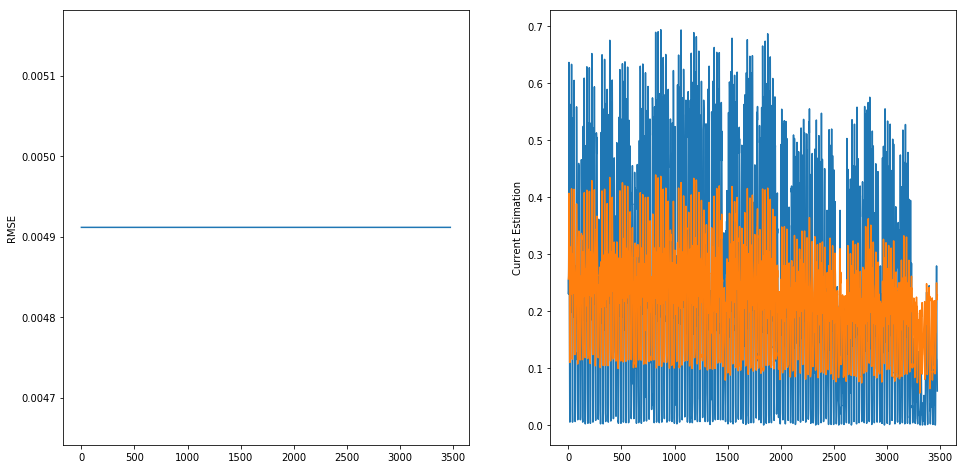

In [31]:
errs = lm.Live(Y,np.asarray(T_test))

- The RMSE score graph remains constant all the time as the weights are getting updated.
- The Predictions and the actual values follow the same pattern only the range of their values differ. As the actual values are more dispersed than the predicted values.

#  Correct Implementation (Preliminary Test)

In [33]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiment

# description, codes

- In this code first the entire csv file is read in a dataframe. Removed least significant features. Keeping these features didn't affect much to the output of the model but the cost of inverting the huge matrix was reduceed as the features were reduced.
- Feature scaling was done on the data using MinMaxScaler() defined. In this the min of the data is subtracted from it and then it is divided by the max-min difference. This preprocessed data was then partitioned into Input features and Target features.
- Since the target values were skewed left for my data they were transformed and normally distributed by taking their logarithmic values.
- These two data were then partitioned into Train and Test sets. The model was trained on Train set and tested against the Test set.
- The RMSE score for the models were found and the corresponding values of Y predictions and actual values was plotted.

# visualization of results

- As can be observed from the above graphs the pattern that the Y predicted values follow in the plots is same as the actual values. But the value range varies between them for some input instances the Y predictions the model gives very different values.
- The RMSE score for the models is around 0.012 and 0.0042. 
- When normalization was applied to the data instead of MinMaxScalar the actual and predicted values had a lot of difference between them. thus, giving bad plots.
- While working with such model (where RMSE csore is low) there is a chance that the model might overfit. Inorder to do so we can use Cross validation technique to check how exactly the data performs on different sets.
- Inorder to find the best fit of w for the nodel we can try to reduce the cost function.

# analysis / comparison of algorithms

- Least Square is a costly approach as it requires the inversion of the entire data matrix as compared to Least mean square and thusis cheaper and a more faster approach. 
- Implementing Least square was more easy as compared to LMS as in LMS we need to take care of the dimensions of the vectors.
- Both the approaches give similar weights for each feature.

#  	Conclusions, References

- Both the approaches gives the similar weights for the features but if there's a constraint of cost of computation and performace then LMS stands to be the better option.
- The model has performs quite well though for some instances the actual ad predicted values differ more in LMS model than LS model
- Other approaches of GD can be used to reduce the cost function and to further improve the model.

References:
- gdlmgdlm 160149, et al. “Calculation and Visualization of Correlation Matrix with Pandas.” Data Science Stack Exchange, datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas.
- Matplotlib Gallery, 2017, matplotlib.org/2.1.1/gallery/index.html.
- Modern Visualization for the Data Era - Plotly, plot.ly/python/.
- StackExchange, datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas.
- The Python Graph Gallery, python-graph-gallery.com/category/seaborn/.
- “Python Data Analysis Library¶.” Pandas: Powerful Python Data Analysis Toolkit - Pandas 0.23.4 Documentation, pandas.pydata.org/.
- Hands on ML by Geron.
- A Medium Corporation "Emulating R regression plots in Python" https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- YelloBrick. "Residual Plots"  https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

# Extra Credit

# what is the most and least significant features for your data
- I tried plotting the effects the columns had on their removal from the data and then the RMSE score (using Least Mean Square) and as can be seen below the RMSE score goes with the output of the correlation graph i.e. the least significant features in the data are instant, season, month holiday, weekday, windspeed whereas, the most significant feature is Registered and Casual users, hr, humidity, temperature as they increase the error score of the model.

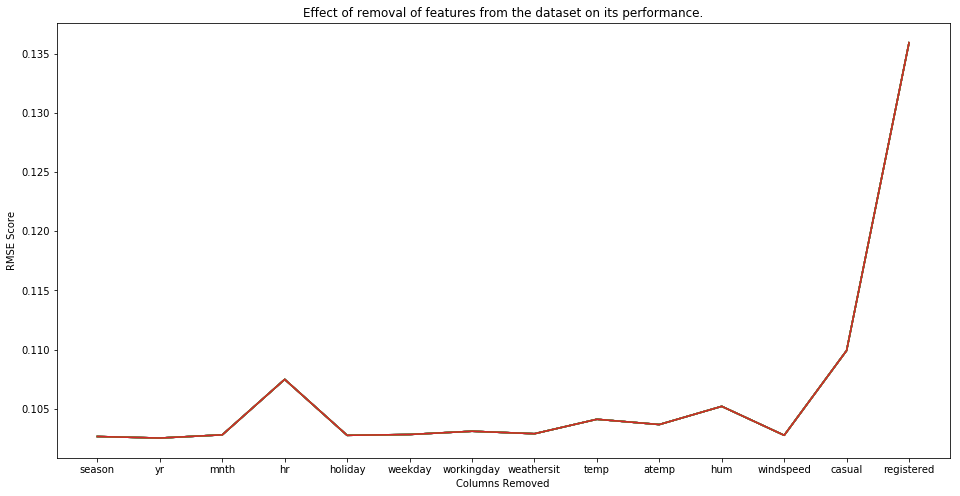

In [34]:
cols = list(df.iloc[:, :-1].head(0))
# print(cols)

# print(df)
def Get_Data(col):
#     rmse = []
    df_cpy = df.copy()
    df_cpy = df_cpy.drop([col], axis = 1)
#         print(df_cpy)
    data_cpy = MinMaxscale(df_cpy)
    pdX_cpy = data_cpy.iloc[:, :-1]
    pdT_cpy = data_cpy.iloc[:, -1]
    Tlog_cpy = (np.log(pdT_cpy + 1)).as_matrix()
    return pdX_cpy,Tlog_cpy


#         print(T)
def Test_Features(X,T):
    w = lm.train(X[0].as_matrix(),np.asarray(T[0]))
    Y= lm.use(X[1].as_matrix())
#         print(T_test)
    lin_mse = mean_squared_error(T[1], Y)
#     rmse.append(np.sqrt(lin_mse))
#         print("in", len(rmse))
#         print(lin_rmse)
    return np.sqrt(lin_mse)

rmse=[]
for i in range(len(cols)):
    pdX_cpy, Tlog_cpy= Get_Data(cols[i])
    X,T = LinearModel.partition(pd.DataFrame(pdX_cpy),pd.DataFrame(Tlog_cpy))
    rmse.append(Test_Features(X,T))

# print(len(rmse))

# # print(len(cols))
# #Plotting the same graphs with lines 
plt.figure(figsize = (16,8))
plt.title("Effect of removal of features from the dataset on its performance.")
for i in range(len(rmse)):
    plt.plot(cols, rmse)
    plt.xlabel("Columns Removed")
    plt.ylabel("RMSE Score")

In [35]:
data_m = MinMaxscale(df)
pd_X = data_m.iloc[:, :-1]
pd_T = data_m.iloc[:, -1]

Tlog = (np.log(pd_T + 1)).as_matrix()
X,T = LinearModel.partition(pd.DataFrame(pd_X),pd.DataFrame(Tlog))
X_train_full = X[0]
X_test_full = X[1]
T_train_full = T[0]
T_test_full = T[1]
ls_w = p.train(X_train_full.as_matrix(),np.asarray(T_train_full))


npX = X_train_full.as_matrix()
npT = T_train_full.as_matrix()
lms_w = lm.train(npX, npT)


res_ls =  pd.DataFrame(ls_w[1:].T, columns = list(pdX.iloc[:, :].head(0)))
display(res_ls)

res_lms = pd.DataFrame(lms_w[1:].T, columns = list(pdX.iloc[:, :].head(0)))
display(res_lms)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,0.00224,-0.000494,0.000261,0.014614,-0.000424,0.000642,0.00034,0.000149,-0.017978,0.029272,-0.006232,0.002241,0.296761,0.699036


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,-0.00163,0.012174,-0.003733,0.126817,-0.000935,0.01366,0.008857,-0.024483,0.051412,0.046985,-0.046995,0.03029,0.100303,0.180333


- As can be seen from the above weights for each column, it can be observed that the features that contributes more(most significant features) are casual and registered users, temp, hum.
- Whereas going according to the weights the features that contributes least are season, mnth, holiday.

# what are the consequences if you remove those features from the model? (Show your work!)

<function matplotlib.pyplot.clf()>

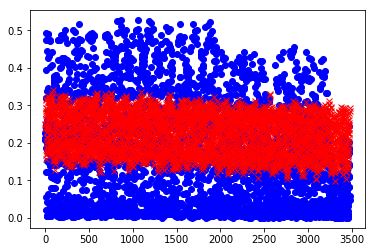

In [36]:
imp_cols = ['casual', 'registered','temp', 'hum']

def Get_DataFrame(col):
#     rmse = []
    df_cpy = df.copy()
    df_cpy = df_cpy.drop(col, axis = 1)
#         print(df_cpy)
    data_cpy = MinMaxscale(df_cpy)
    pdX_cpy = data_cpy.iloc[:, :-1]
    pdT_cpy = data_cpy.iloc[:, -1]
    Tlog_cpy = (np.log(pdT_cpy + 1)).as_matrix()
    return pdX_cpy,Tlog_cpy

def check_impact(X,T):
    w = lm.train(X[0].as_matrix(),np.asarray(T[0]))
    Y= lm.use(X[1].as_matrix())
    p.Estimate(Y, T_test)
    return E
              
# for i in range(len(imp_cols)):
pdX_cpy, Tlog_cpy= Get_DataFrame(imp_cols)
X,T = LinearModel.partition(pd.DataFrame(pdX_cpy),pd.DataFrame(Tlog_cpy))
E = check_impact(X,T)
plt.clf   

- As can be seen from the above graph that the actual values are distributed across the entire graph but, the predicted values just fall within some range and thus for many test input instances there's difference between the actual and predicted values. It can be seen the predictions are quite good for alot of inputs in the above LMS implementation which had  all these significant features in the dataset.

# produce residual plots and observe the patterns for the goodness of fit ?

### Note:

<b> The following way of plotting Residual Plot has been adapted from an article by 'A Medium Corporation' "Emulating R regression plots in Python" https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034</b>

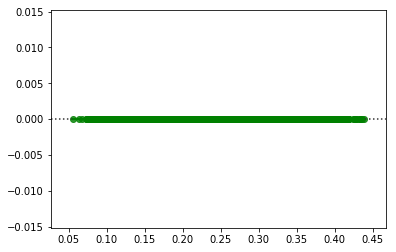

In [37]:
x = np.asarray(errs)
y = np.asarray(Y).reshape(Y.shape[0],)
sns.residplot(y, x, lowess=True, color="g")

- From the above Residual plot, it can be observed that the model is a good fit as the residues taht is the difference between the actual and predicted values lie along the regression line.
- The  model would not have been a good fit if the data points i.e. residues would have followed some curve path instead of being scattered above and below the line.

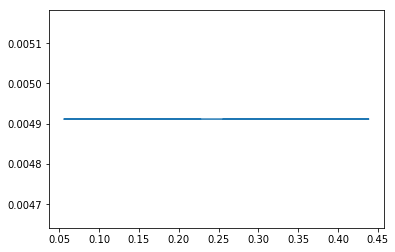

In [38]:
plt.plot(y, x)